# Exploratory Data Analysis and Preprocessing for Cardiovascular Risk

## 1. Import Libraries

In [1]:
!pip install mglearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

%matplotlib inline
sns.set_style('whitegrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.5 MB/s eta 0:00:00


## 2. Load Data

The dataset is loaded from the `processed.cleveland.data` file. The column names are not present in the file, so we'll add them based on the dataset documentation.

In [3]:
column_names = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'target'
]

df = pd.read_csv('processed.cleveland.data', header=None, names=column_names, na_values='?')


## 3. Initial Data Exploration

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 4. Handling Missing Values

Let's check for missing values in our dataset.

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


It appears that `ca` (number of major vessels colored by flourosopy) and `thal` (thalassemia) have missing values. Given the small number of missing values, we can consider imputing them. For categorical features, using the mode is a common strategy. For `ca`, which is numeric but represents a count, using the median or mode could be appropriate. Let's use the mode for both for simplicity.

In [9]:
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

/tmp/ipython-input-3879146777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace=True)
/tmp/ipython-input-3879146777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [10]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


The target variable `num` (which we've named `target`) has values from 0 (no disease) to 4. For the classification task, we need to convert this into a binary target: 0 for no disease and 1 for presence of disease (values 1, 2, 3, 4).

In [11]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

## 5. Exploratory Data Analysis (EDA) - Visualizations

### Target Variable Distribution

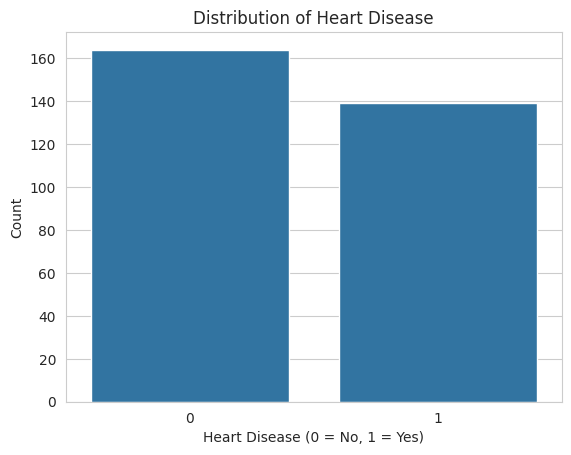

In [12]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Continuous Features Distribution

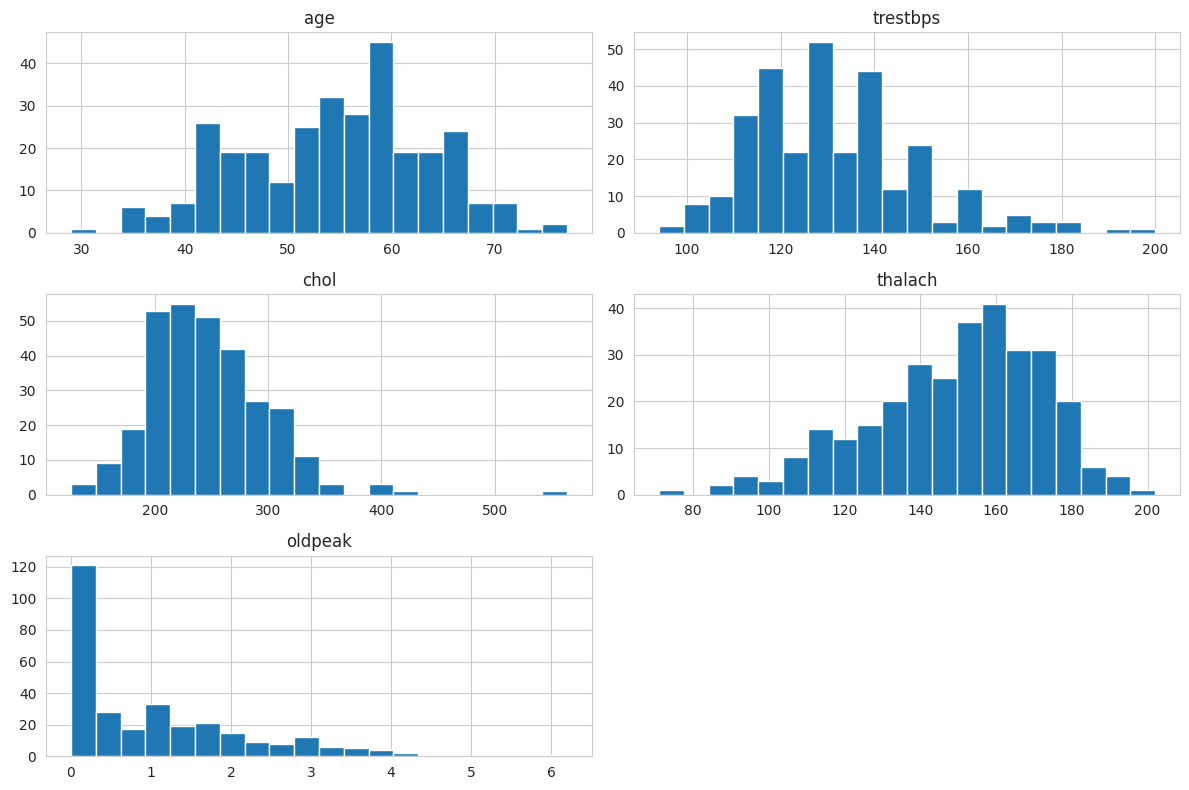

In [13]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continuous_features].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

### Outlier Detection with Boxplots

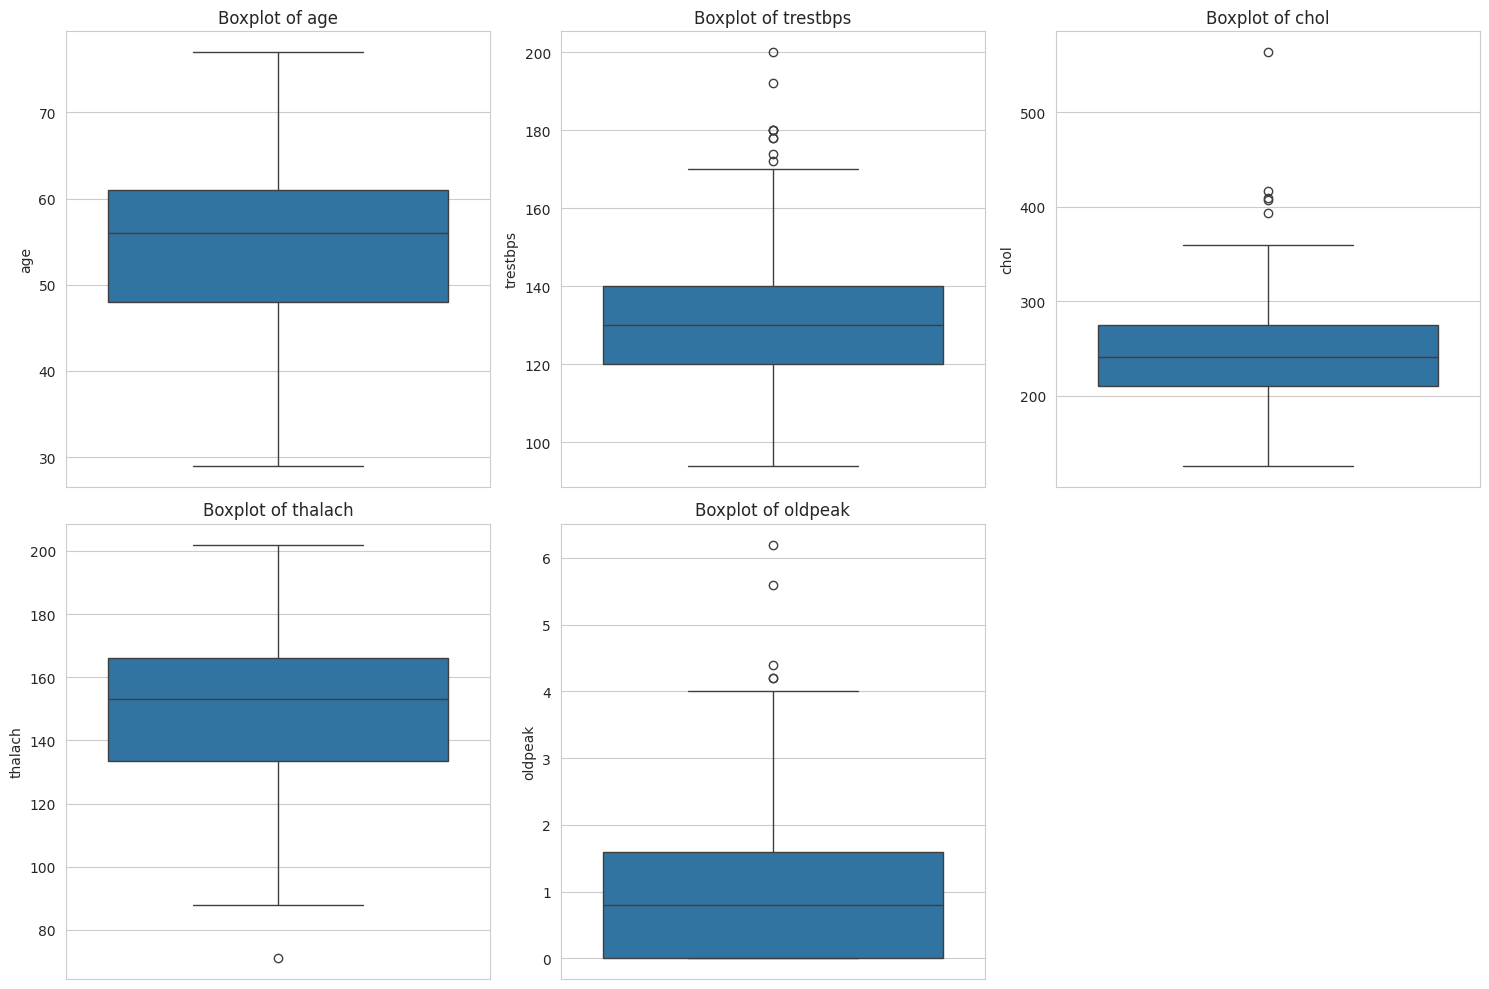

In [14]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

From the boxplots, we can see some potential outliers in `trestbps`, `chol`, and `oldpeak`. For now, we will keep them, but this is something to be aware of as it might affect model performance.

### Correlation Matrix

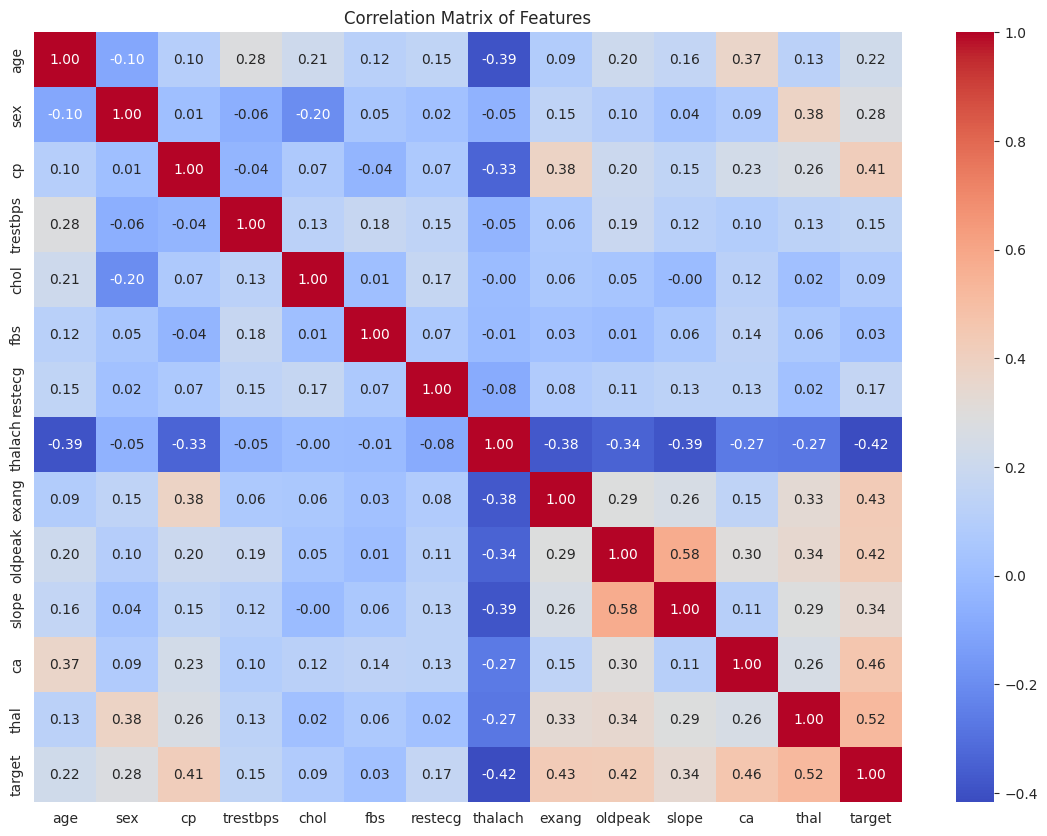

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

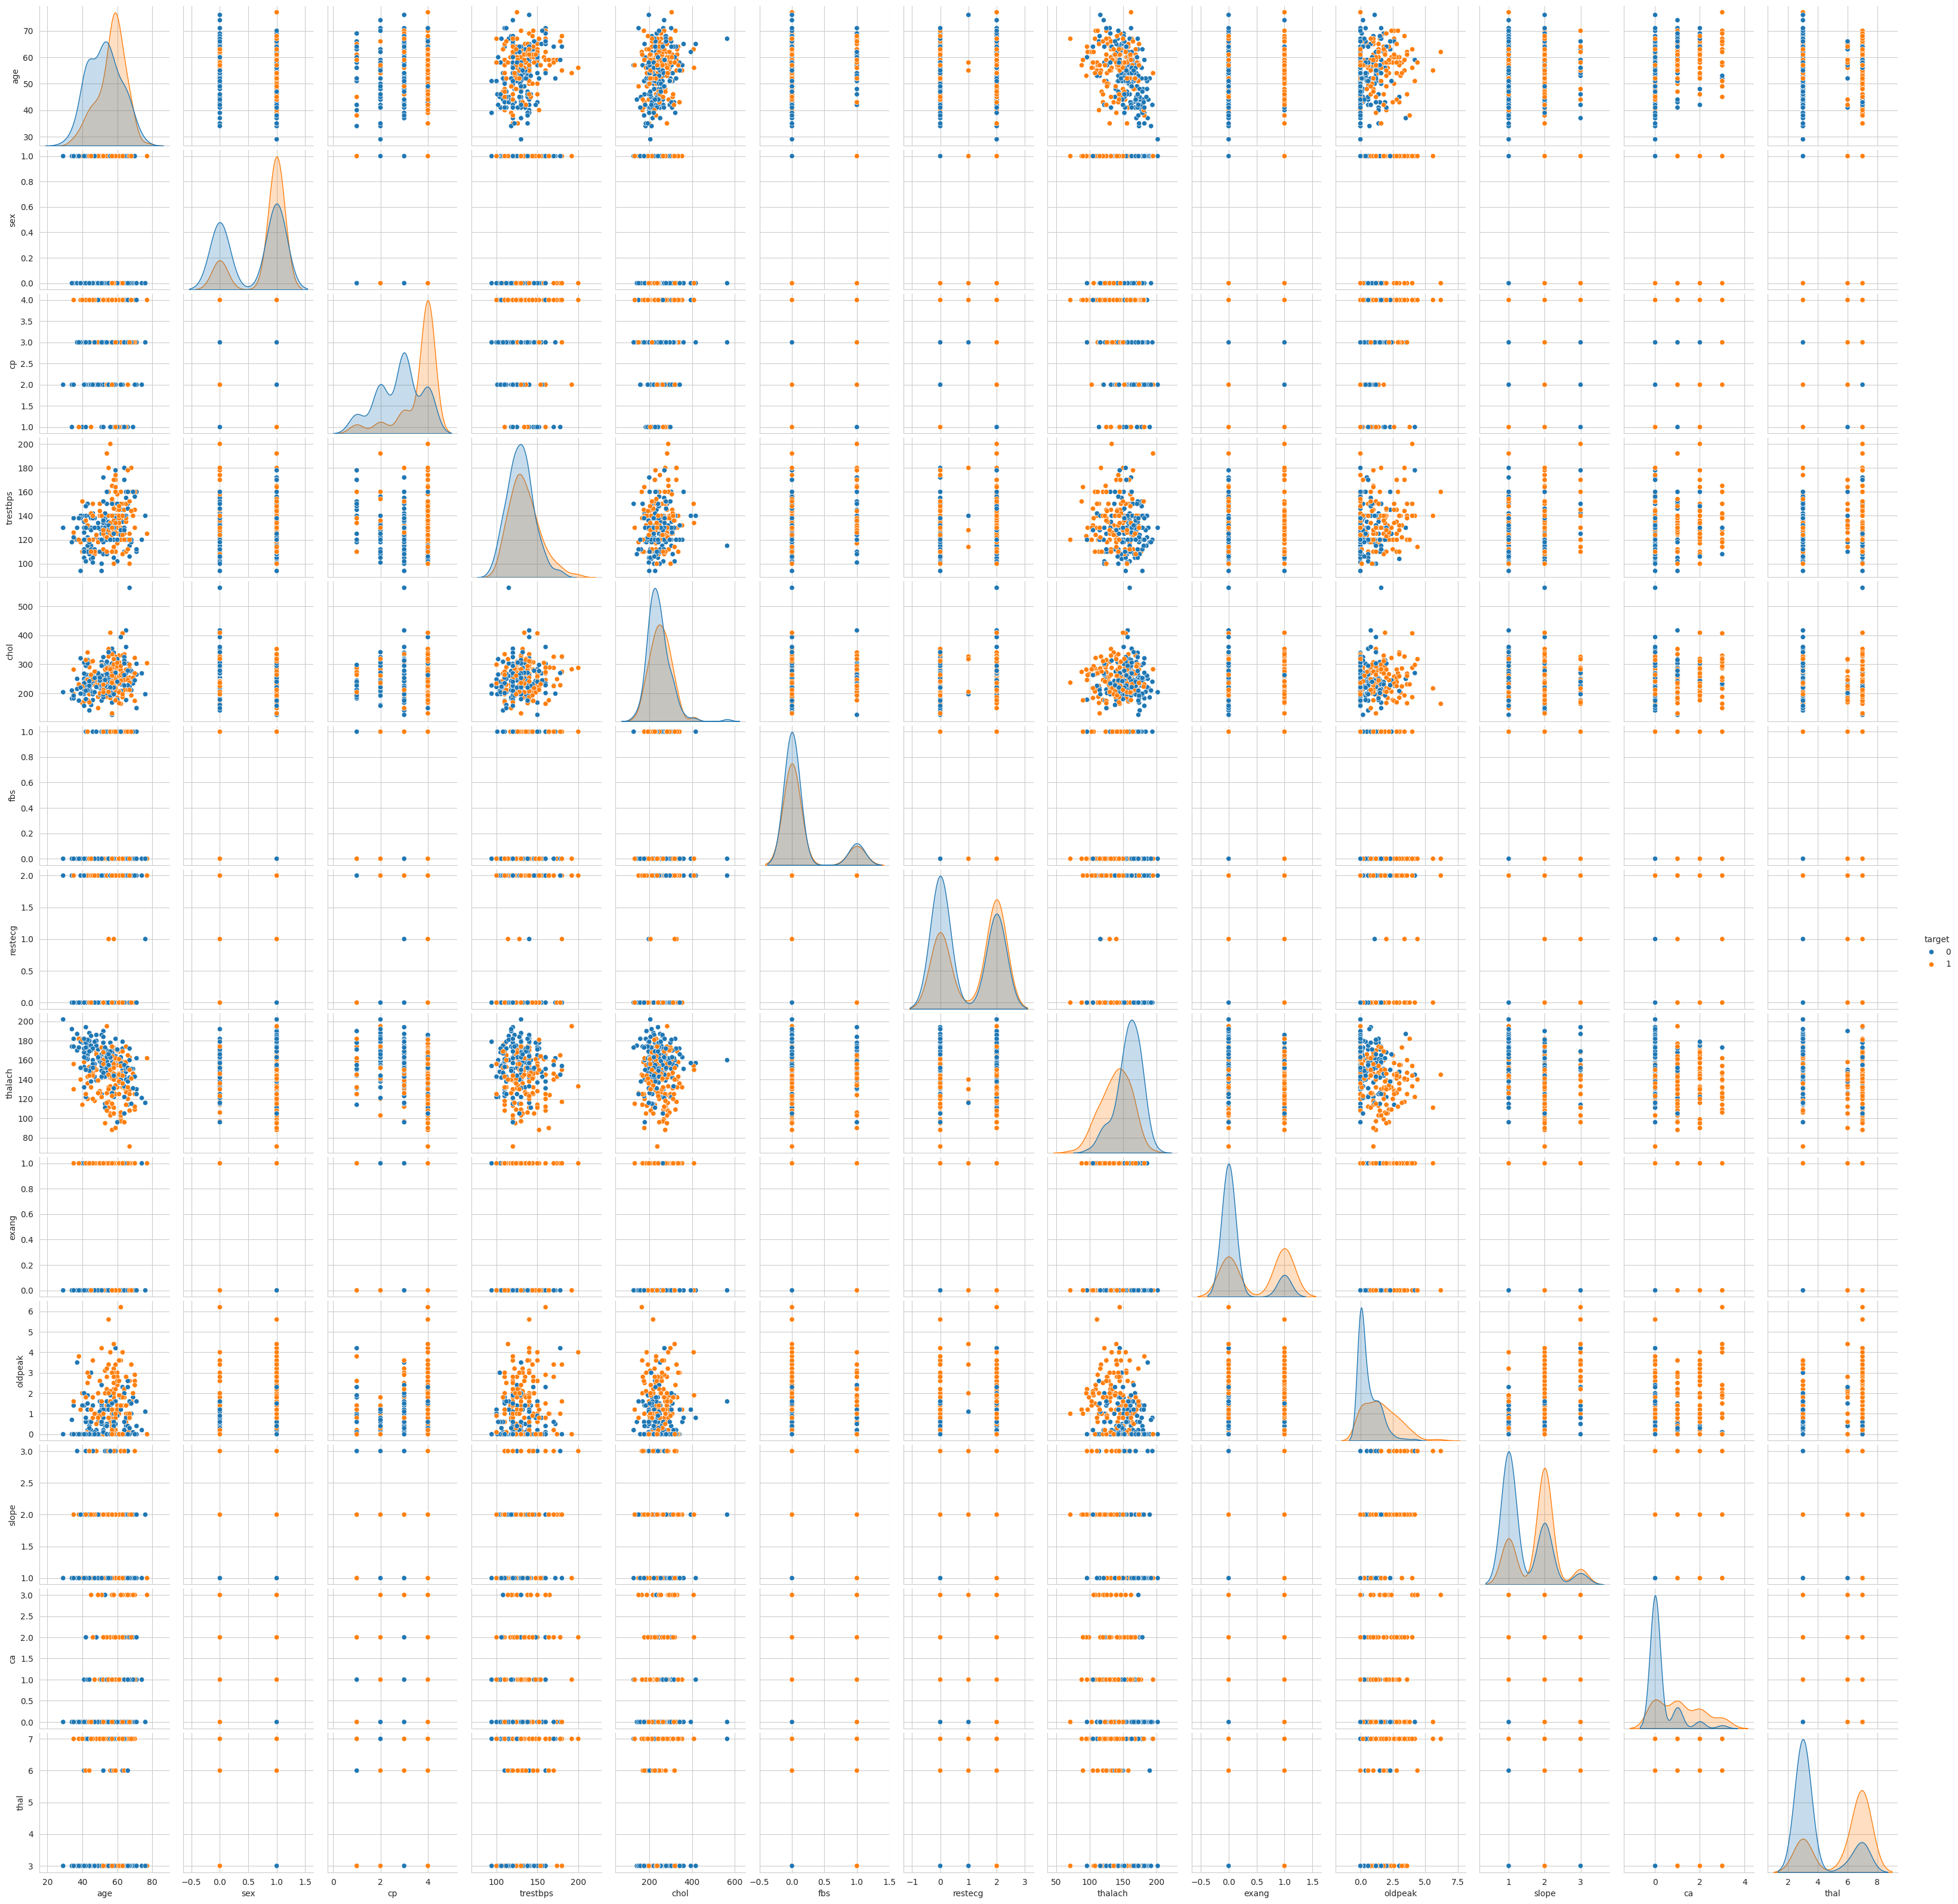

In [16]:
sns.pairplot(df, hue='target')
plt.show()

### Categorical Feature Analysis

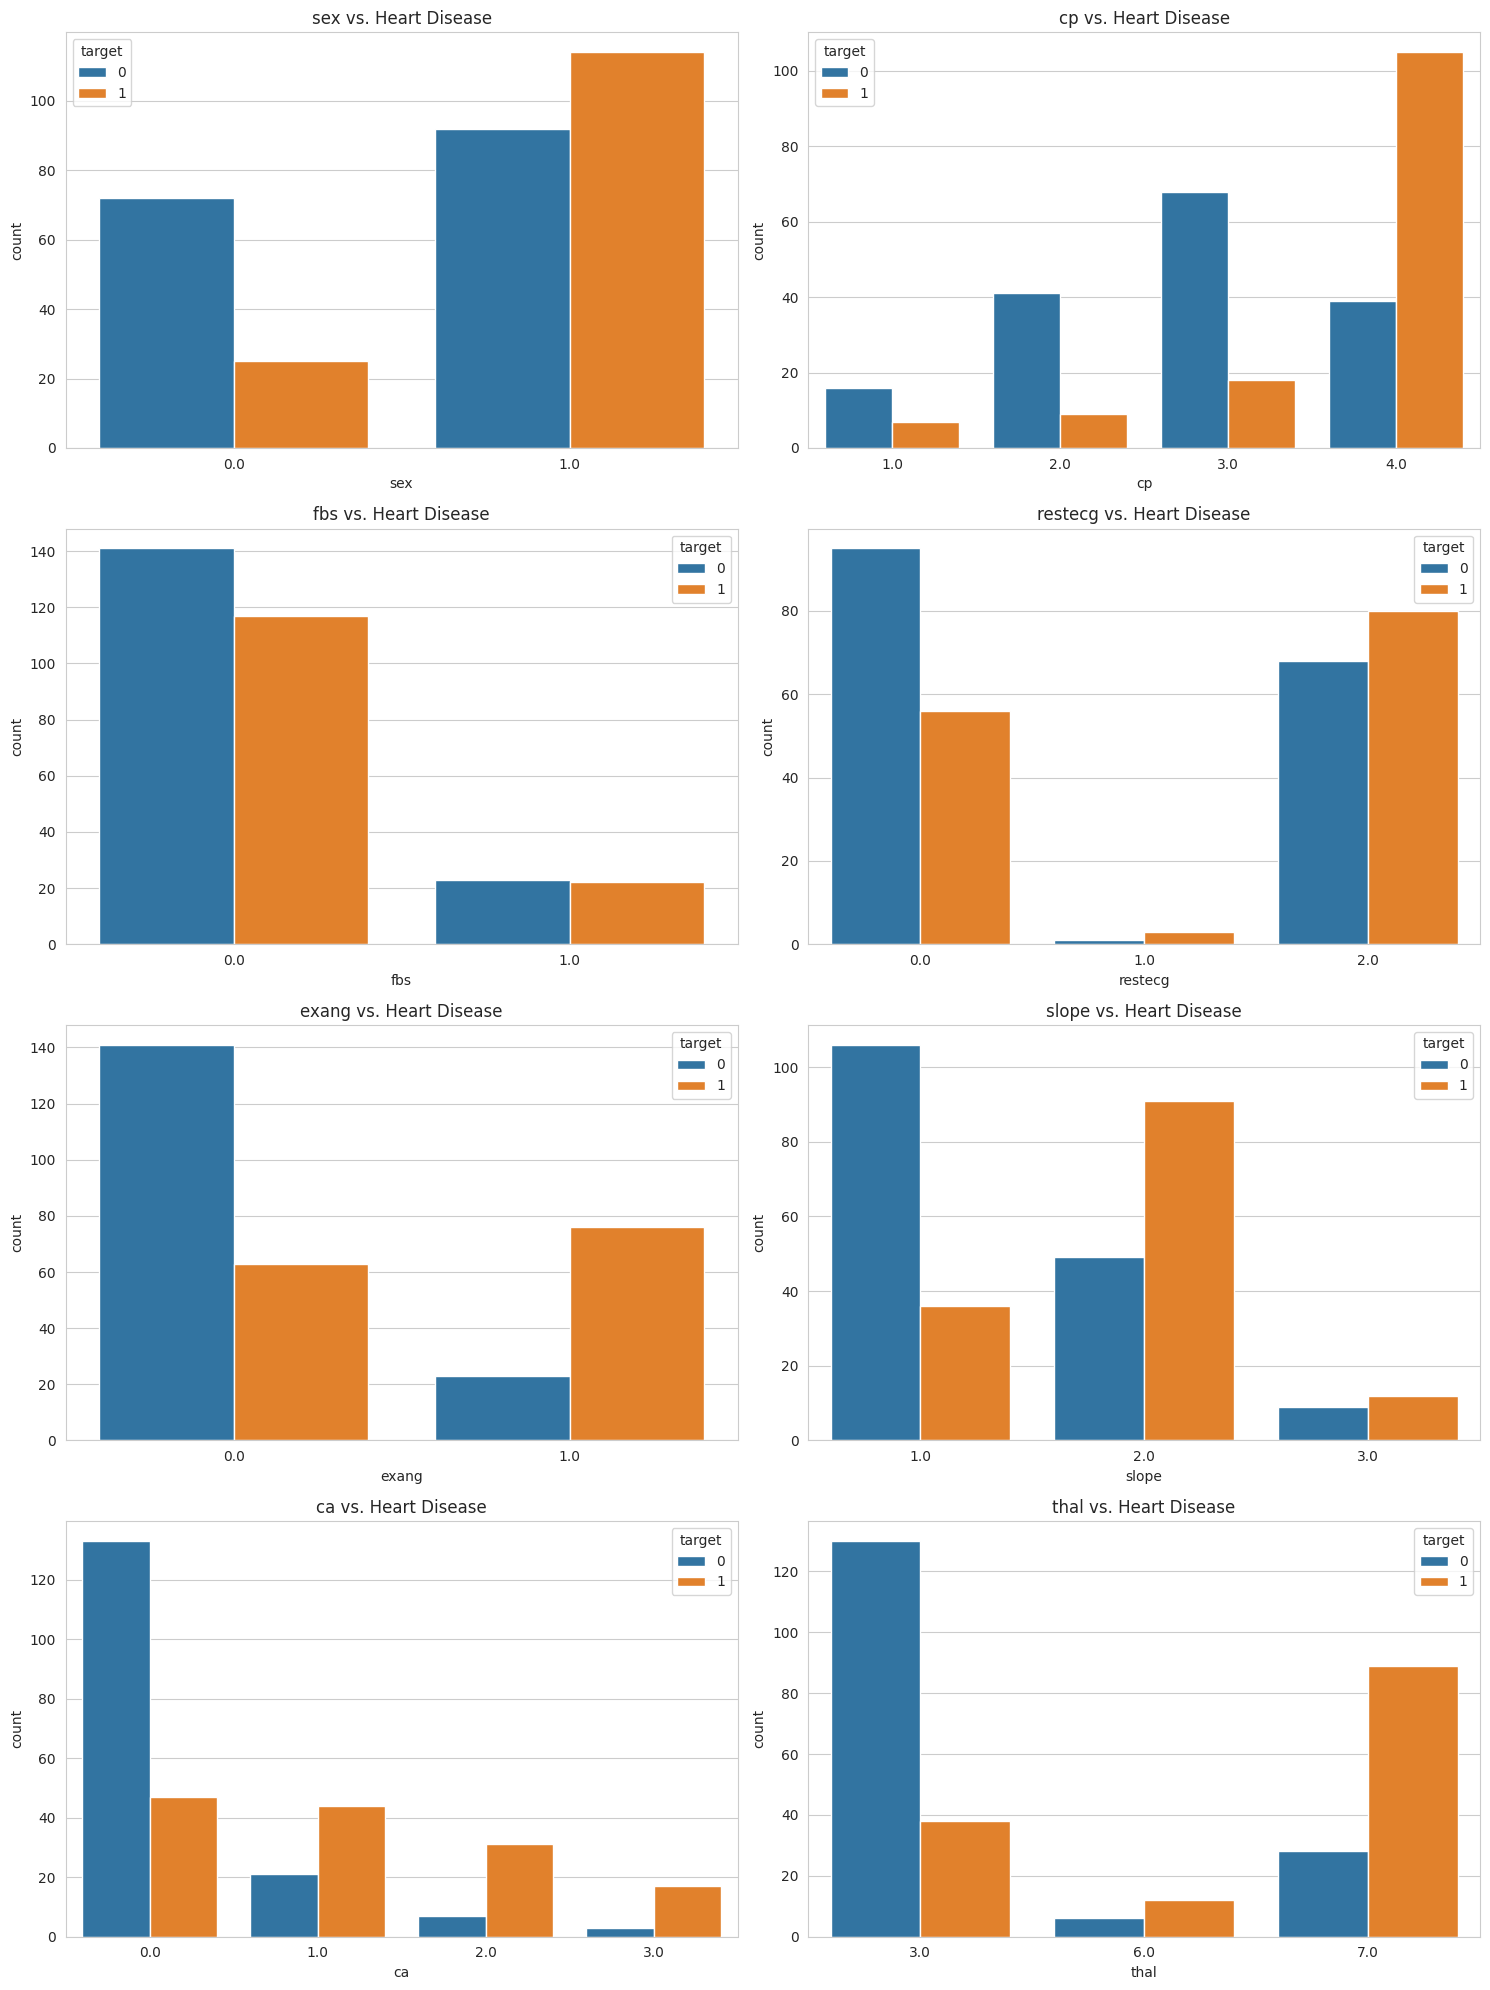

In [17]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Heart Disease')

plt.tight_layout()
plt.show()

## 6. Preprocessing for Models

Based on the project plan, we will perform One-Hot Encoding for categorical features and Standardization for continuous features.

In [18]:
from sklearn.model_selection import train_test_split

# 2. Separate Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Split data (80% Train, 20% Test)
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 212
Test samples: 91


In [19]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the One-Hot Encoder
enc = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# 1. Fit on Train, transform both
X_train_encoded = enc.fit_transform(X_train[categorical_features])
X_test_encoded = enc.transform(X_test[categorical_features])

# 2. Get column names
cat_columns = enc.get_feature_names_out(categorical_features)

# 3. Convert back to Pandas DataFrames
# Now we can safely use X_train.index because we didn't overwrite X_train
X_train_cat_df = pd.DataFrame(X_train_encoded, columns=cat_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_encoded, columns=cat_columns, index=X_test.index)

# Show the result
print("Encoded Shape:", X_train_cat_df.shape)
X_train_cat_df.head()

Encoded Shape: (212, 15)


,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
124,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
72,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
163,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Initialize Scaler
scaler = StandardScaler()

# 2. Fit on Train, Transform Both
# We use the continuous_features
X_train_cont = scaler.fit_transform(X_train[continuous_features])
X_test_cont = scaler.transform(X_test[continuous_features])

# 3. Convert back to Pandas DataFrames
X_train_cont_df = pd.DataFrame(X_train_cont, columns=continuous_features, index=X_train.index)
X_test_cont_df = pd.DataFrame(X_test_cont, columns=continuous_features, index=X_test.index)

print("Scaled successfully!")
print("Scaled Shape:", X_train_cont_df.shape)
X_train_cont_df.head()

Scaled successfully!
Scaled Shape: (212, 5)


,age,trestbps,chol,thalach,oldpeak
124,1.124144,0.301038,0.761835,1.066773,0.295689
72,0.796333,-0.664307,0.445233,-2.331003,0.626487
15,0.249982,0.944601,-1.644337,1.066773,0.461088
10,0.249982,0.408298,-1.137775,-0.111122,-0.531305
163,0.359252,-1.736912,0.044205,-1.289018,-0.035108


In [22]:
# Concatenate the scaled continuous features and the encoded categorical features
X_train_processed = pd.concat([X_train_cont_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_cont_df, X_test_cat_df], axis=1)

print("Final Training Data Shape:", X_train_processed.shape)
print("Final Test Data Shape:", X_test_processed.shape)

Final Training Data Shape: (212, 20)
Final Test Data Shape: (91, 20)


In [23]:
from google.colab import files

# 1. Save and Download X_train (Features)
X_train_processed.to_csv('cleveland_X_train_processed.csv', index=False)
files.download('cleveland_X_train_processed.csv')

# 2. Save and Download X_test (Features)
X_test_processed.to_csv('cleveland_X_test_processed.csv', index=False)
files.download('cleveland_X_test_processed.csv')

# 3. Save and Download y_train (Target)
y_train.to_csv('cleveland_y_train_processed.csv', index=False)
files.download('cleveland_y_train_processed.csv')

# 4. Save and Download y_test (Target)
y_test.to_csv('cleveland_y_test_processed.csv', index=False)
files.download('cleveland_y_test_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### This concludes the initial EDA and preprocessing. The data is now ready for splitting and model training as per the project plan.